# Лабораторная работа 1. Линейная регрессия и факторный анализ.
**Цель работы:** изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

**Датасет:** https://www.kaggle.com/datasets/mustafamaher2520/student-performance-data

**Описание:**

Этот набор данных содержит подробные записи об учениках с указанием их академической успеваемости по 100-балльной шкале. В него включены различные факторы, которые могут влиять на результаты учащихся, такие как среднее количество часов сна за ночь, уровень стресса по самооценке по шкале от 1 до 10, предыдущие результаты экзаменов и ежедневное количество часов, затрачиваемых на учёбу. Каждый ученик имеет уникальный идентификационный номер.

| Переменная | Описание |
| :---: | :--- |
| Student_ID | Уникальный идентификатор для каждого студента (Исключаем, т.к. не нужен) |
| Performance_Score | Академическая успеваемость (0–100) (**Зависимая переменная**) |
| Sleep_Hours | Среднее количество часов сна за ночь |
| Stress_Level | Уровень стресса по самоотчету (1 — очень низкий, 10 — очень высокий) |
| Previous_Exam_Scores | Результаты предыдущих экзаменов (0–100) |
| Study_Hours | Среднее ежедневное время учебы в часах |

## 1. Загрузка датасета из репозитория

In [10]:
import pandas as pd

df = pd.read_csv('StdPerfScore.csv')
df = df.drop(columns=['Student_ID'])
print(df)

     Performance_Score  Sleep_Hours  Stress_Level  Previous_Exam_Scores  \
0                28.70         4.40          6.40                 87.20   
1                33.50         7.50          5.80                 72.10   
2                40.50         8.70          4.00                 62.20   
3                44.80         6.60          1.00                 80.80   
4                36.80         8.50          4.60                 53.20   
..                 ...          ...           ...                   ...   
317              25.91         5.34          3.19                 50.80   
318              45.97         7.66          5.37                 62.37   
319              30.49         5.22          6.37                 67.45   
320              37.94         7.74          3.83                 39.76   
321              27.17         7.72          6.09                 42.67   

     Study_Hours  
0           4.30  
1           3.90  
2           3.80  
3           4.70  
4   

## 2. Подготовка данных: первичный анализ, визуализация распределения признаков и целевой переменной

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Performance_Score     322 non-null    float64
 1   Sleep_Hours           322 non-null    float64
 2   Stress_Level          322 non-null    float64
 3   Previous_Exam_Scores  322 non-null    float64
 4   Study_Hours           322 non-null    float64
dtypes: float64(5)
memory usage: 12.7 KB
None


По выводу видно типы данных переменных и отсутсвие пустых (NaN) значений.

In [8]:
print(df.describe())

       Performance_Score  Sleep_Hours  Stress_Level  Previous_Exam_Scores  \
count         322.000000   322.000000    322.000000            322.000000   
mean           30.966118     7.079938      5.075839             63.325186   
std             8.346712     1.479526      1.947092             14.544545   
min             6.070000     3.140000      1.000000             15.110000   
25%            25.305000     6.132500      3.640000             53.577500   
50%            31.135000     7.060000      5.220000             63.385000   
75%            36.512500     7.940000      6.505000             71.787500   
max            60.430000    11.000000     10.000000            100.000000   

       Study_Hours  
count   322.000000  
mean      4.036180  
std       1.999453  
min       0.000000  
25%       2.692500  
50%       3.900000  
75%       5.367500  
max       9.190000  


Performance_Score
Ассиметрия: -0.047
Эксцесс: 0.265
Колмогорова-Смирнова p-value: 0.991
Колмогорова-Смирнова статистика: 0.024
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Sleep_Hours
Ассиметрия: 0.038
Эксцесс: -0.111
Колмогорова-Смирнова p-value: 0.769
Колмогорова-Смирнова статистика: 0.037
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Stress_Level
Ассиметрия: -0.151
Эксцесс: -0.488
Колмогорова-Смирнова p-value: 0.448
Колмогорова-Смирнова статистика: 0.047
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Previous_Exam_Scores
Ассиметрия: 0.002
Эксцесс: 0.158
Колмогорова-Смирнова p-value: 0.679
Колмогорова-Смирнова статистика: 0.040
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05

Study_Hours
Ассиметрия: 0.012
Эксцесс: -0.454
Колмогорова-Смирнова p-value: 0.825
Колмогорова-Смирнова статистика: 0.035
Колмогорова-Смирнова нормальность: Да
Уровень значимости: 0.05



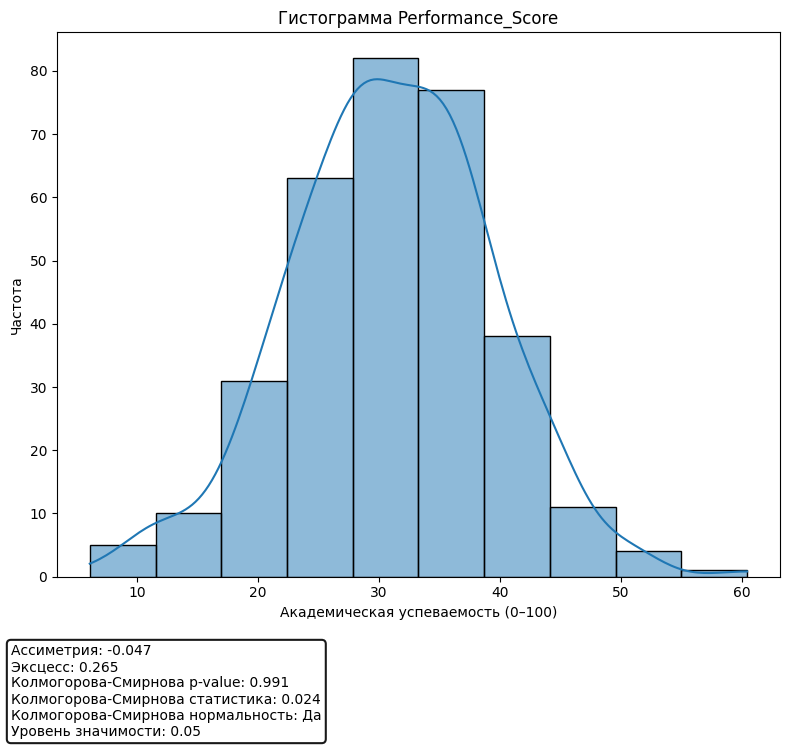

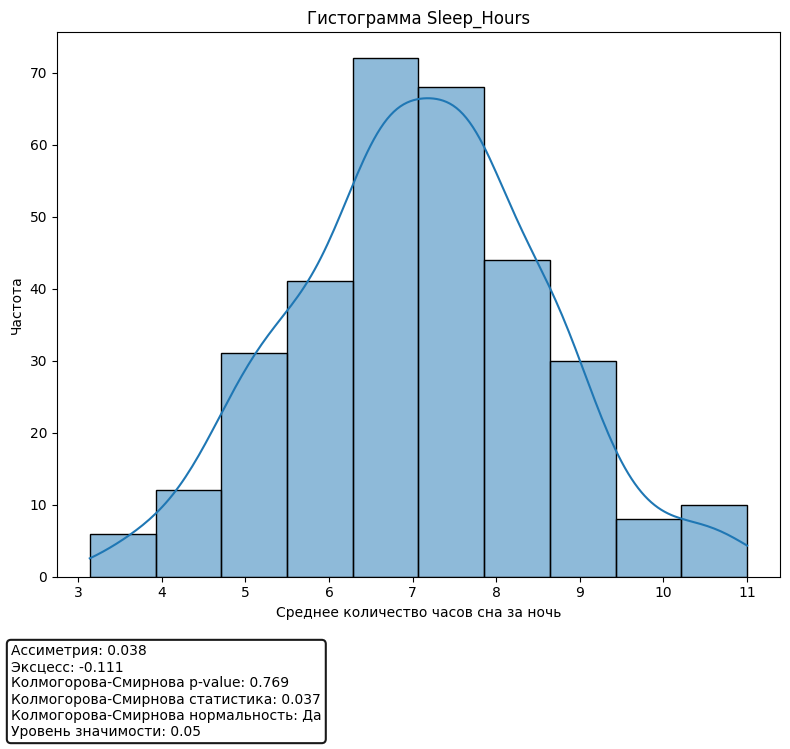

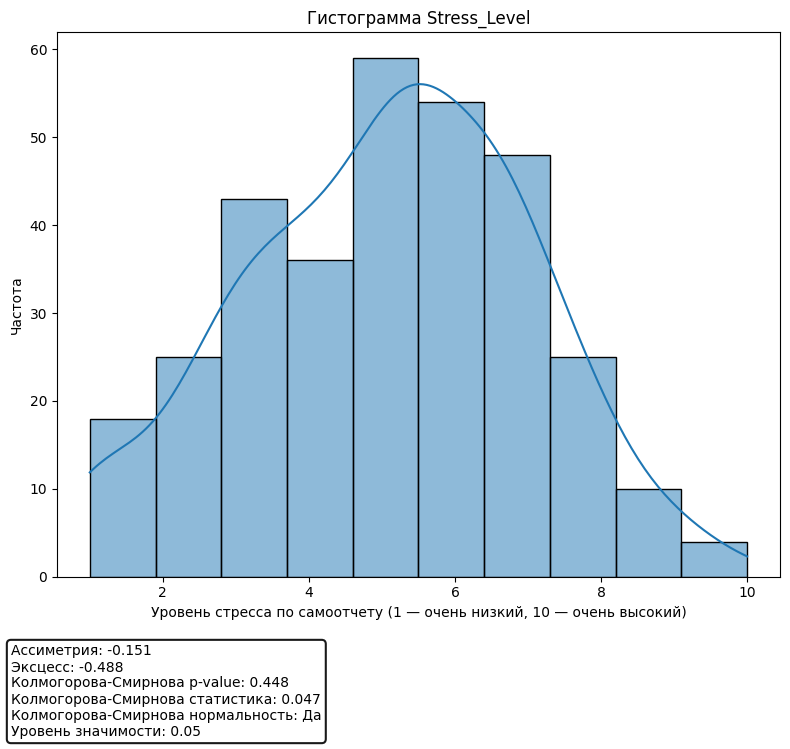

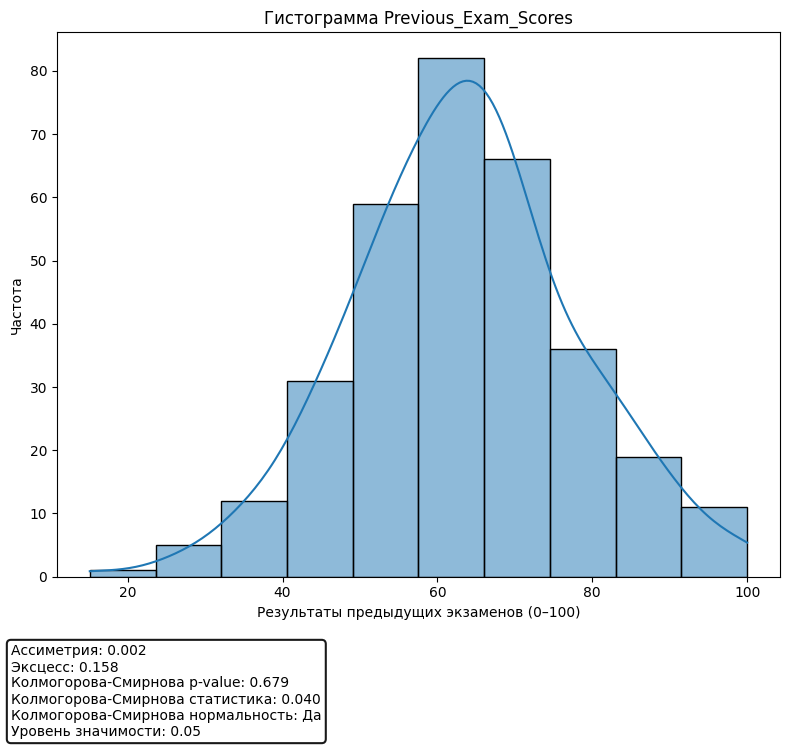

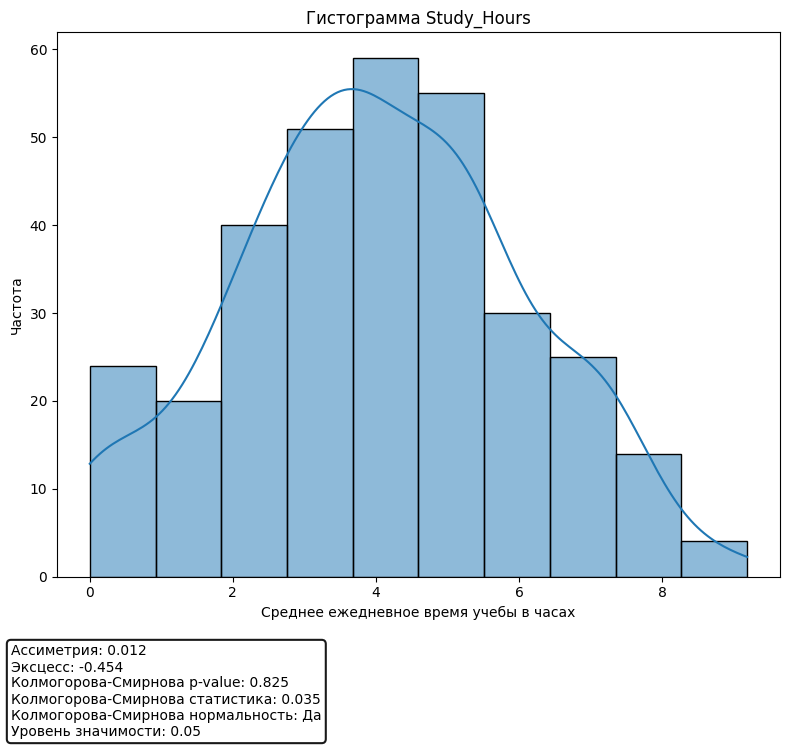

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew, kurtosis, kstest

ALPHA = 0.05

descriptions = {
    'Performance_Score': 'Академическая успеваемость (0–100)',
    'Sleep_Hours': 'Среднее количество часов сна за ночь',
    'Stress_Level': 'Уровень стресса по самоотчету (1 — очень низкий, 10 — очень высокий)',
    'Previous_Exam_Scores': 'Результаты предыдущих экзаменов (0–100)',
    'Study_Hours': 'Среднее ежедневное время учебы в часах'
}

for _, column in enumerate(df.columns):
    plt.figure(figsize=(8, 8))
    sb.histplot(df[column], kde=True, bins='sturges')

    ks_stat, ks_p_value = kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))

    legend = (
        f'Ассиметрия: {skew(df[column]):.3f}\n'
        f'Эксцесс: {kurtosis(df[column]):.3f}\n'
        f'Колмогорова-Смирнова p-value: {(ks_p_value):.3f}\n'
        f'Колмогорова-Смирнова статистика: {(ks_stat):.3f}\n'
        f'Колмогорова-Смирнова нормальность: {'Да' if ks_p_value >= ALPHA else 'Нет'}\n'
        f'Уровень значимости: {ALPHA}'
    )

    plt.figtext(
        0.02, 
        0.02, 
        legend, 
        ha='left', 
        va='bottom', 
        fontsize=10, 
        bbox=dict(
            boxstyle='round', 
            facecolor='white', 
            edgecolor='black',
            linewidth=1.5,
            alpha=0.9
        )
    )

    print(column)
    print('=========================')
    print(legend)
    print('=========================\n')

    plt.title(f'Гистограмма {column}')
    plt.xlabel(descriptions[column])
    plt.ylabel('Частота')
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])


### Анализ результатов:

1. Performance_Score:
    - **Ср. значение (30.966)** ≈ **медиане (31.135)** - хорошее соответствие;
    - **Асимметрия: -0.047** - практически симметричное распределение, минимальная левосторонняя асимметрия;
    - **Эксцесс: 0.265** - умеренно островершинное распределение, близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.991 > 0.05)*.

2. Sleep_Hours:
    - **Ср. значение (7.080)** ≈ **медиане (7.060)** - отличное соответствие;
    - **Асимметрия: 0.038** - практически идеальная симметрия распределения;
    - **Эксцесс: -0.111** - платообразное распределение, очень близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.769 > 0.05)*.

3. Stress_Level:
    - **Ср. значение (5.076)** ≈ **медиане (5.220)** - хорошее соответствие;
    - **Асимметрия: -0.151** - слабая левосторонняя асимметрия;
    - **Эксцесс: -0.488** - платообразное распределение, более плоское чем нормальное;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.448 > 0.05)*.

4. Previous_Exam_Scores:
    - **Ср. значение (63.325)** ≈ **медиане (63.385)** - отличное соответствие;
    - **Асимметрия: 0.002** - практически идеальная симметрия распределения;
    - **Эксцесс: 0.158** - умеренно островершинное распределение, близкое к нормальному;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.679 > 0.05)*.

5. Study_Hours:
    - **Ср. значение (4.036)** ≈ **медиане (3.900)** - хорошее соответствие;
    - **Асимметрия: 0.012** - практически симметричное распределение;
    - **Эксцесс: -0.454** - платообразное распределение, более плоское чем нормальное;
    - **Колмогоров-Смирнов:** является нормальным распределением т.к. p-value > α *(0.825 > 0.05)*.

**Все пять исследуемых переменных демонстрируют высокую степень близости к нормальному распределению.**

## 3. Предобработка данных: удаление пропущенных значений, кодирование категориальных переменных, нормализация признаков.
Предобработка не требуется:
- Нет пропусков и категориальных переменных
- Все признаки числовые с нормальным распределением

На всякий случай попробуем удалить пропуски:

In [25]:
print(f'Исходный размер датафрейма:{df.shape}')

df = df.replace('?', pd.NA).dropna()

print(f'Размер после удаления пропущенных значений: {df.shape}')

Исходный размер датафрейма:(322, 5)
Размер после удаления пропущенных значений: (322, 5)


Что и требовалось доказать.

## 4. Построение матрицы корреляций. Выводы о наличии мультиколлинеарности (расчёт VIF-коэффициента).